In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

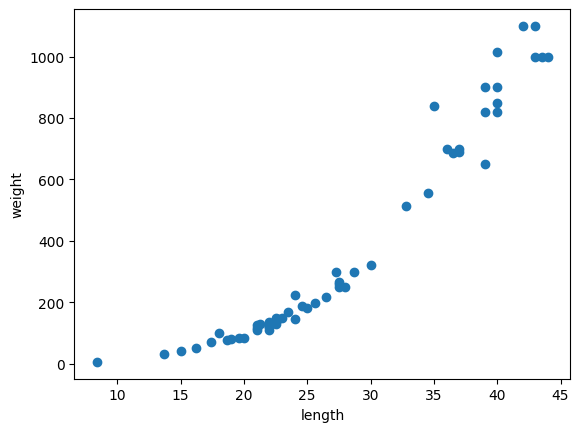

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42,), (14,), (42,), (14,))

Bạn đang gặp lỗi **IndexError** do chỉ số vượt quá kích thước của mảng `X_scaled`. Trong trường hợp này, `reshape()` có thể hữu ích nếu `indexes` hoặc `X_scaled` có định dạng không phù hợp. Dưới đây là cách sử dụng `reshape()` để đảm bảo kích thước dữ liệu đúng khi trực quan hóa.

---

## 🔍 **Cách sử dụng `reshape()` trong trường hợp này**
### 1️⃣ **Kiểm tra kích thước của `indexes` trước khi sử dụng**
Trước khi vẽ biểu đồ, hãy kiểm tra kích thước của `indexes`:
```python
print("Indexes shape:", indexes.shape)
print("X_scaled shape:", X_scaled.shape)
```
Nếu `indexes` có dạng `(1, k)`, bạn cần làm phẳng nó bằng `.ravel()` hoặc `.reshape(-1)`:
```python
indexes = indexes.ravel()  # Hoặc indexes.reshape(-1)
```
Điều này giúp `indexes` trở thành một mảng 1D có thể sử dụng trực tiếp.

---

### 2️⃣ **Đảm bảo `X_scaled` có đúng số chiều**
Nếu `X_scaled` chỉ có một cột nhưng đang sử dụng `[:, 0]`, có thể gây lỗi. Hãy kiểm tra kích thước của `X_scaled`:
```python
print("X_scaled shape:", X_scaled.shape)
```
Nếu `X_scaled` có dạng `(n_samples,)` thay vì `(n_samples, n_features)`, cần reshape:
```python
X_scaled = X_scaled.reshape(-1, 1)
```
Điều này đảm bảo `X_scaled` có ít nhất 2D để truy xuất đúng.

---

### 3️⃣ **Áp dụng `reshape()` khi cần**
Sau khi kiểm tra kích thước, sửa code vẽ biểu đồ:
```python
indexes = indexes.ravel()  # Đảm bảo indexes là mảng 1D

# Kiểm tra giới hạn index để tránh lỗi
if indexes.max() < X_scaled.shape[0]:  
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label="Data", alpha=0.5)
    plt.scatter(new_marker[0], new_marker[1], marker='^', color='red', label="New Marker")
    plt.scatter(X_scaled[indexes, 0], X_scaled[indexes, 1], marker='D', color='green', label="Neighbors")
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()
else:
    print("⚠ Lỗi: Chỉ số lân cận vượt quá số lượng điểm trong X_scaled")
```

---

## ✅ **Tóm lại**
- **Dùng `.ravel()` hoặc `.reshape(-1)` để làm phẳng `indexes`.**
- **Đảm bảo `X_scaled` có đúng số chiều với `.reshape(-1, 1)` nếu cần.**
- **Kiểm tra chỉ số trong `indexes` để tránh vượt quá giới hạn của `X_scaled`.**

Nếu lỗi vẫn xảy ra, có thể `kneighbors()` đang tìm quá nhiều điểm, cần giảm `n_neighbors`! 🚀

In [5]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_train.shape, X_test.shape

((42, 1), (14, 1))

# 걸정계수 (R^2)
### 📌 **결정계수 (R², Coefficient of Determination)란?**  
결정계수 \( R^2 \) 는 회귀 분석에서 모델의 성능을 평가하는 지표로, **모델이 실제 데이터를 얼마나 잘 설명하는지**를 나타냅니다.  

- **R² 값 범위:**  
  \[
  0 \leq R^2 \leq 1
  \]
  - **\( R^2 = 1 \)**: 완벽한 모델 (모든 데이터를 완벽하게 예측)  
  - **\( R^2 = 0 \)**: 모델이 아무런 설명력을 가지지 못함 (평균값을 예측하는 것과 동일)  
  - **\( R^2 < 0 \)**: 모델이 너무 부정확하여 평균값보다도 못한 예측을 수행  

---

### 🔹 **R² 공식**
\[
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
\]
- \( SS_{\text{res}} \) (Residual Sum of Squares, 잔차 제곱합):  
  \[
  SS_{\text{res}} = \sum (y_i - \hat{y}_i)^2
  \]
  모델의 예측값 \( \hat{y}_i \) 와 실제값 \( y_i \) 사이의 차이(잔차)의 제곱합  

- \( SS_{\text{tot}} \) (Total Sum of Squares, 총 변동):  
  \[
  SS_{\text{tot}} = \sum (y_i - \bar{y})^2
  \]
  실제 데이터의 평균 \( \bar{y} \) 과 개별 데이터 값 \( y_i \) 사이의 차이의 제곱합  

👉 **쉽게 말하면,**  
- \( SS_{\text{res}} \)가 작을수록 모델의 오차가 작음  
- \( R^2 \) 값이 클수록 모델이 데이터를 잘 설명  

---

### 🔹 **Python 코드 예제**
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 예제 데이터 생성
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])  # 실제 값

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 결정계수 계산
r2 = r2_score(y, y_pred)
print("결정계수 (R²):", r2)
```

---

### 🔹 **R² 해석**
- **높은 R²** → 모델이 데이터를 잘 설명 (0.8~1.0이 이상적)
- **낮은 R²** → 모델이 데이터를 제대로 설명하지 못함 (0~0.5)
- **음수 R²** → 모델이 아예 잘못된 방향으로 예측 (평균값 예측보다 나쁨)  

> 💡 **주의:**  
> - 다항 회귀나 비선형 데이터에서는 R² 값이 낮을 수도 있음  
> - 과적합된 모델의 경우 R² 값이 높더라도 일반화 성능이 떨어질 수 있음  

---

### 🔥 **추가 개념: Adjusted R² (수정된 결정계수)**
- 다중 회귀 분석에서는 변수가 많아질수록 R² 값이 증가하지만, **과적합 문제**가 발생할 수 있음  
- **수정된 R² (\( R^2_{adj} \))**은 변수 개수를 고려하여 R² 값을 조정한 것  

\[
R^2_{adj} = 1 - \left( \frac{(1 - R^2) (n - 1)}{n - p - 1} \right)
\]
- \( n \): 데이터 샘플 개수  
- \( p \): 독립 변수 개수  

👉 **변수 개수가 많아지면 R²_adj가 감소할 수도 있어 과적합을 방지하는 데 유용!**  

---

### ✅ **정리**
- **결정계수 (R²)**: 회귀 모델이 데이터를 얼마나 잘 설명하는지 측정  
- **0 ≤ R² ≤ 1** (높을수록 좋음, 음수가 될 수도 있음)  
- **단순 회귀에서는 R²만 봐도 괜찮지만, 다중 회귀에서는 Adjusted R²도 고려**  

🚀 **모델 성능을 평가할 때는 RMSE, MAE 같은 다른 지표와 함께 사용하면 더 정확한 판단이 가능!**

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.992809406101064

#### 📌 **결정계수 (R²) là gì?**  
**결정계수 (R², Coefficient of Determination)** là một chỉ số đánh giá trong mô hình hồi quy, cho biết **mức độ mà mô hình giải thích được phương sai của dữ liệu thực tế**.  

- **R² dao động trong khoảng:**  
  \[
  0 \leq R^2 \leq 1
  \]
  - **\( R^2 = 1 \)**: Mô hình dự đoán hoàn hảo.  
  - **\( R^2 = 0 \)**: Mô hình không giải thích được dữ liệu, chỉ dự đoán bằng giá trị trung bình.  
  - **\( R^2 < 0 \)**: Mô hình tệ hơn cả việc đoán bằng giá trị trung bình.  

---

### 🔹 **Công thức tính R²**
$$ 
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} 
$$

Trong đó:  
- **\($$ SS_{\text{res}}$$ \) (Residual Sum of Squares - Tổng bình phương phần dư)**:  
  \[
 $$ SS_{\text{res}} = \sum (y_i - \hat{y}_i)^2  $$
  \]
  Là tổng bình phương sai số giữa giá trị thực \( y_i \) và giá trị dự đoán \( \hat{y}_i \).  

- **\$$( SS_{\text{tot}} \) $$(Total Sum of Squares - Tổng bình phương tổng thể)**:  
  \[
 $$ SS_{\text{tot}} = \sum (y_i - \bar{y})^2$$
  \]
  Là tổng bình phương sai số giữa giá trị thực \( y_i \) và giá trị trung bình của dữ liệu \( \bar{y} \).  

👉 **Nói một cách đơn giản:**  
- Nếu **\$$( SS_{\text{res}} $$\) nhỏ** ⇒ Mô hình dự đoán tốt.  
- Nếu **\$$( R^2 \) $$gần 1** ⇒ Mô hình dự đoán chính xác.  
- Nếu **\$$( R^2 \) $$gần 0 hoặc âm** ⇒ Mô hình dự đoán kém.  

---

### 🔹 **Ví dụ Python**
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Dữ liệu mẫu
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])  # Giá trị thực tế

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Tính R²
r2 = r2_score(y, y_pred)
print("R² =", r2)
```

---

### 🔹 **Ý nghĩa của R²**
- **R² cao (gần 1):** Mô hình dự đoán tốt.  
- **R² thấp (gần 0):** Mô hình chưa phù hợp với dữ liệu.  
- **R² âm:** Mô hình quá tệ, thậm chí còn kém hơn so với việc đoán trung bình.  

---

### 🔥 **Chỉ số liên quan: R² hiệu chỉnh (Adjusted R²)**
Trong hồi quy đa biến, số lượng biến đầu vào có thể ảnh hưởng đến R², khiến giá trị này luôn tăng khi thêm biến mới. Để tránh điều này, người ta dùng **Adjusted R²**:

\[
R^2_{adj} = 1 - \left( \frac{(1 - R^2) (n - 1)}{n - p - 1} \right)
\]
- \( n \) là số mẫu dữ liệu.  
- \( p \) là số biến độc lập.  

👉 **Adjusted R² giúp kiểm soát việc thêm biến không cần thiết vào mô hình.**  

---

### ✅ **Kết luận**
- **R² đánh giá mức độ phù hợp của mô hình hồi quy.**  
- **\( 0 \leq R^2 \leq 1 \)**, giá trị càng cao thì mô hình càng tốt.  
- **Hạn chế của R²:** Không đánh giá được độ chính xác của từng dự đoán, cần kết hợp với RMSE hoặc MAE.  

🚀 **Hãy sử dụng R² cùng với các chỉ số khác để đánh giá mô hình chính xác hơn!**

# 절댓값 오차 (MAE)
### 📌 **절대값 오차 (MAE, Mean Absolute Error)란?**
**절대값 오차 (MAE, Mean Absolute Error)** 는 회귀 모델의 예측값과 실제값 사이의 **절대값 차이**를 평균한 지표입니다.

In [7]:
from sklearn.metrics import mean_absolute_error

y_test_prediction = knr.predict(X_test)
mae = mean_absolute_error(y_test, y_test_prediction)
mae


19.157142857142862


# 과대적합(Overfitting)과 과소적합(Underfitting)
### 📌 **Underfitting과 Overfitting이란?**

Underfitting(과소적합)과 Overfitting(과적합)은 머신러닝 모델이 학습 데이터에 대해 어떻게 일반화하는지를 설명하는 개념입니다.

---

## 🔹 **Underfitting (과소적합)**

### 🧐 **정의**

- 모델이 **훈련 데이터조차 제대로 학습하지 못한 상태**
- 너무 단순한 모델을 사용하여 데이터의 패턴을 제대로 반영하지 못함

### ⚠️ **원인**

1. 모델이 너무 단순함 (ex: 너무 적은 뉴런/레이어를 가진 신경망)
2. 학습 데이터 부족
3. 학습이 충분히 진행되지 않음 (early stopping)
4. 중요한 특징(feature)을 고려하지 않음

### 📉 **결과**

- 훈련 데이터와 테스트 데이터 모두에서 낮은 성능을 보임
- 데이터의 패턴을 잘 반영하지 못함

### ✅ **해결 방법**

- 더 복잡한 모델 사용 (ex: 레이어 추가, 파라미터 증가)
- 학습 데이터 증가
- 충분한 학습 수행 (더 많은 epoch)
- 중요한 특징(feature) 추가

---

## 🔹 **Overfitting (과적합)**

### 🧐 **정의**

- 모델이 **훈련 데이터에 너무 과하게 최적화된 상태**
- 훈련 데이터에서는 성능이 높지만, 새로운 데이터(테스트 데이터)에서는 성능이 크게 떨어짐

### ⚠️ **원인**

1. 모델이 너무 복잡함 (ex: 너무 많은 뉴런/레이어를 가진 신경망)
2. 학습 데이터를 지나치게 오래 학습함 (epoch가 너무 많음)
3. 훈련 데이터에 노이즈가 많아서 불필요한 패턴까지 학습함
4. 훈련 데이터가 너무 적음

### 📉 **결과**

- 훈련 데이터에서는 성능이 높지만, 테스트 데이터에서는 성능이 낮음
- 일반화(generalization) 능력이 부족

### ✅ **해결 방법**

- Regularization 적용 (L1, L2 정규화)
- Dropout 사용 (딥러닝의 경우)
- 학습 데이터 증가
- Early stopping 적용 (적절한 시점에서 학습 중단)
- Feature selection을 통해 불필요한 변수 제거

---

## 🔍 **Underfitting vs Overfitting 비교**

|  | Underfitting (과소적합) | Overfitting (과적합) |
| --- | --- | --- |
| **모델 복잡도** | 너무 단순함 | 너무 복잡함 |
| **훈련 데이터 성능** | 낮음 | 높음 |
| **테스트 데이터 성능** | 낮음 | 낮음 |
| **원인** | 부족한 학습, 단순한 모델 | 과도한 학습, 복잡한 모델 |
| **해결 방법** | 모델 복잡도 증가, 더 많은 학습 | Regularization, Dropout, Early Stopping |

---

### 📊 **시각적 이해**

- Underfitting: 직선이 모든 데이터를 잘 설명하지 못하는 경우
- Overfitting: 곡선이 모든 점을 지나지만 새로운 데이터에 적용하기 어려운 경우

```
Underfitting      Good Fit       Overfitting
   |                 |                 |
   |       -  -  -  |  -  -  -  -      |
   |      -   -  -  |  -  -  -  -      |
   |     -    -   - | -   -   -   -    |
----------------------------------------------
   모델이 너무 단순함   적절한 복잡도   모델이 너무 복잡함

```

---

## 🎯 **결론**

- **Underfitting** → 모델이 너무 단순해서 학습이 잘 안됨
- **Overfitting** → 모델이 너무 복잡해서 새로운 데이터에 약함
- **Best Fit** → 훈련 데이터와 테스트 데이터에서 좋은 성능을 내는 상태

**➡️ 목표: Underfitting과 Overfitting 사이의 균형을 맞추는 것!**


In [8]:
# ㅇ웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 다시 학습
knr.fit(X_train, y_train)
knr.score(X_test, y_test)

0.9746459963987609

### 귀즈 2번

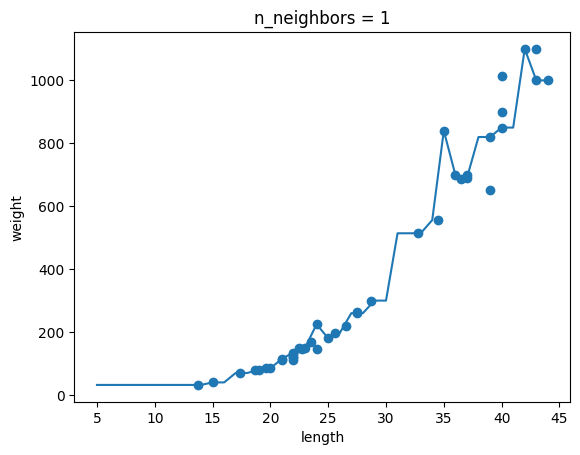

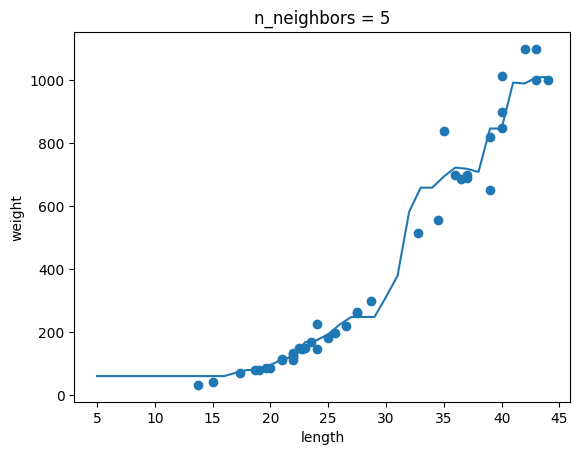

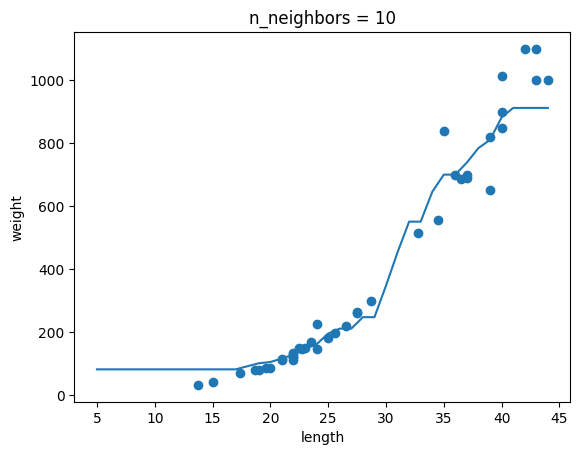

In [9]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(X_train, y_train)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(X_train, y_train)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 3-2 선형 회귀

In [10]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_train.shape, X_test.shape

((42, 1), (14, 1))

In [12]:
knr.n_neighbors = 3
knr.fit(X_train, y_train)

knr.score(X_test, y_test)

0.9746459963987609

In [13]:
# 이제 이 모델을 사용해 길이가 50cm인 농어의 무게를 예측할 것이다.
knr.predict([[50]])

array([1033.33333333])

## 산점표 그리기

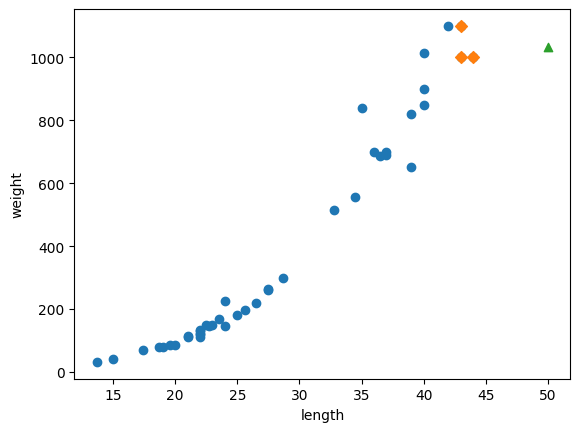

In [14]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이가 50cm인 농어의 이웃을 찾아보니 길이가 45cm인 농어가 가장 가까운 이웃으로 나타났다.
- 이웃 샘플의 무게를 확인해보니 1033g이다.

In [15]:
print(np.mean(y_train[indexes]))

1033.3333333333333


In [16]:
print(knr.predict([[100]]))

[1033.33333333]


### Cho dù có cho chiều dài cơ thể của con cá là 100cm, mô hình vẫn dự đoán rằng trọng lượng của nó chỉ khoảng 1033g.
- Mô hình dự đoán quá tối dẫn đến không thể dự đoán trọng lượng của cá lớn.


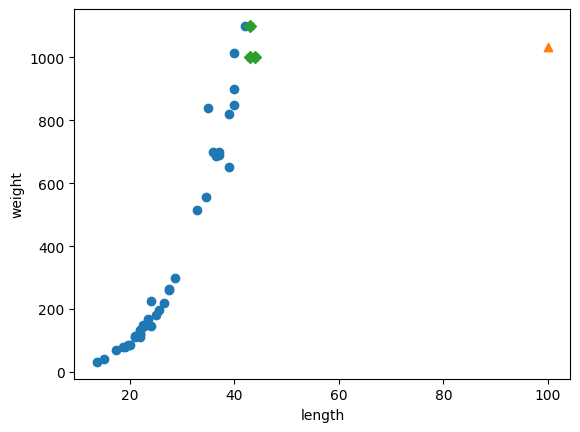

In [17]:
# 100cm 그래프를 한 번 그려 확인 해보자.

distances, indexes = knr.kneighbors([[100]])

plt.scatter(X_train, y_train)
plt.scatter(100, 1033, marker='^')
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀 (Linear Regression)
**선형 회귀(Linear Regression)**는 통계학 및 머신러닝에서 널리 사용되는 **회귀 분석** 기법 중 하나로, 두 변수 간의 관계를 직선으로 모델링하는 방법입니다. 선형 회귀는 **독립 변수**(feature)와 **종속 변수**(target) 간의 선형 관계를 찾는 데 사용됩니다.

### 📌 **선형 회귀의 개념**
선형 회귀 모델은 **y = mx + b**의 형태로 표현됩니다:
- **y**는 종속 변수(예측하려는 값),
- **x**는 독립 변수(특성),
- **m**은 기울기(회귀 계수),
- **b**는 y 절편입니다.

선형 회귀의 목표는 **기울기(m)와 절편(b)** 값을 찾아서 주어진 데이터를 잘 설명하는 직선을 만드는 것입니다.

### 🔹 **단순 선형 회귀 (Simple Linear Regression)**:
단순 선형 회귀는 하나의 독립 변수와 종속 변수 간의 관계를 찾습니다. 예를 들어, **`x`**(특성)와 **`y`**(목표) 간의 선형 관계를 모델링합니다.

### 🔹 **다중 선형 회귀 (Multiple Linear Regression)**:
다중 선형 회귀는 여러 개의 독립 변수와 종속 변수 간의 관계를 모델링합니다. **`y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ`**와 같은 형태로 표현됩니다.

### 📌 **선형 회귀 공식**
1. **단순 선형 회귀**:
   $$
   y = mx + b
   $$
2. **다중 선형 회귀**:
   $$
   y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
   $$

---

### 📌 **Python을 사용한 선형 회귀 예시**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 예시 데이터 (X: 특성, y: 목표)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # 특성
y = np.array([1, 2, 1.3, 3.75, 2.25])  # 목표

# 선형 회귀 모델 생성
model = LinearRegression()

# 훈련 데이터로 모델 학습
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 회귀선 그리기
plt.scatter(X, y, color='red')  # 데이터 점
plt.plot(X, y_pred, color='blue')  # 회귀선
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 회귀 계수 및 절편 출력
print("기울기 (m):", model.coef_)
print("절편 (b):", model.intercept_)
```

### 📌 **설명**:
1. **`LinearRegression()`**: 선형 회귀 모델을 생성합니다.
2. **`fit(X, y)`**: 주어진 훈련 데이터 `X`와 `y`를 사용하여 모델을 학습시킵니다.
3. **`predict(X)`**: 훈련된 모델을 사용하여 새로운 입력 `X`에 대해 예측 값을 계산합니다.
4. **`model.coef_`**: 학습된 기울기(m)를 반환합니다.
5. **`model.intercept_`**: 학습된 절편(b)을 반환합니다.

### 📌 **선형 회귀 결과 해석**:
- **기울기(m)**: 특성 x가 1 증가할 때, 목표 y가 얼마나 증가하는지를 나타냅니다.
- **절편(b)**: 특성 x가 0일 때 목표 y의 값을 나타냅니다.

이 코드에서는 **`X`**와 **`y`** 사이의 선형 관계를 모델링하여 회귀선을 그립니다.

---

### 📌 **결과 시각화**:
- 빨간 점은 실제 데이터를 나타내고, 파란 선은 학습된 선형 회귀 모델을 나타냅니다.
- 선형 회귀 모델은 데이터의 트렌드를 잘 따라가며, 새로운 데이터에 대한 예측을 할 수 있게 됩니다.

선형 회귀는 간단하지만 많은 데이터에 대해서 강력한 예측 능력을 가질 수 있는 기본적인 모델입니다.

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)  # 결정계수 R²

0.824750312331356

In [19]:
print(lr.predict([[50]]))

[1241.83860323]


### 선형 회귀 모델을 사용하면 길이가 50cm인 농어의 무게를 1241g으로 예측한다.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbEY565%2FbtrfPhTP6IH%2FsKrg7nZ6soySfnWkIhQlMk%2Fimg.png">

In [20]:
print(lr.coef_, lr.intercept_)
# coef_는 기울기를 종종 셰수, intercept_는 가중치라고 부른다.
# 기울기 : độ dốc, intercept : tỉ trọng(weight) 

[39.01714496] -709.0186449535474


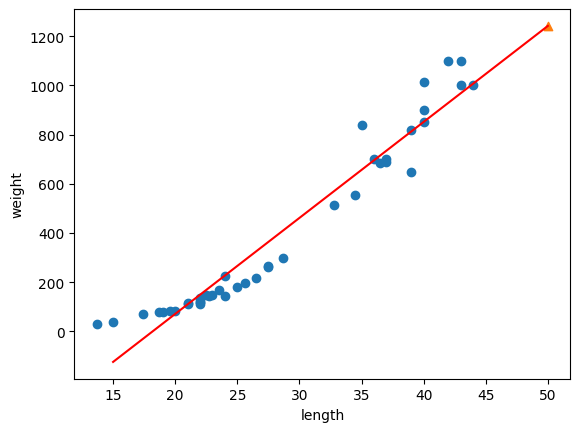

In [23]:
# 훈련 세틍의 산점도 그리기
plt.scatter(X_train, y_train)

plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red')
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# 훈련 모델 평가와 데스트 모델 평가
# lr.score(X_train, y_train), lr.score(X_test, y_test)
print(lr.score(X_train, y_train), lr.score(X_test, y_test), sep='\n')

0.9398463339976041
0.824750312331356
